In [7]:
#Installing swifter library
!pip3 install swifter

In [8]:
#Handles data loading, cleaning and preprocessing.
import pandas as pd
import swifter

# 1. Veri Yükleme
df = pd.read_csv("train.csv")

# 2. Eksik verileri temizleme
df = df.dropna()

# 3. Metin Ön İşleme (Swifter ile hızlandırılmış)
def preprocess_text(text):
    text = text.lower()  # Küçük harfe çevir
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Noktalama temizleme
    return text

df["text"] = df["text"].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/18285 [00:00<?, ?it/s]

In [9]:
#Transforms text into numerical features using TF-IDF and trains and saves model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
import joblib
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2))),  # Daha az özellik, bigram ekleme
    ("clf", SGDClassifier(loss="hinge", random_state=42))  # Hızlı SVM benzeri model
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy  # Hata oranı hesaplama
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Error Rate: {error_rate:.4f}")

Model Accuracy: 0.9562
Model Error Rate: 0.0438



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2082
           1       0.96      0.93      0.95      1575

    accuracy                           0.96      3657
   macro avg       0.96      0.95      0.96      3657
weighted avg       0.96      0.96      0.96      3657



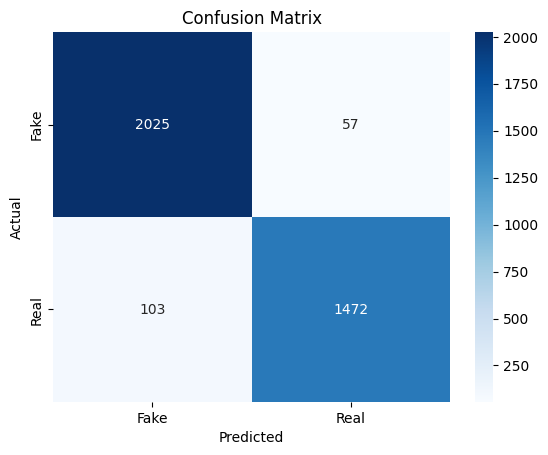

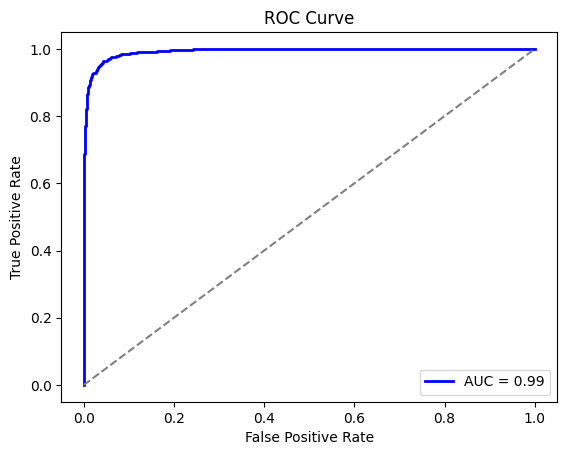

Text(0.5, 1.0, 'Real News WordCloud')

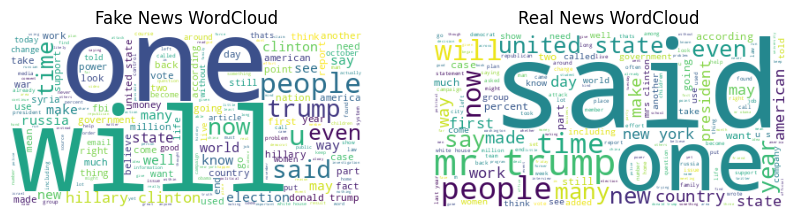

In [10]:
#Evaluates model performance and generates visualizations.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_absolute_error
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

# Performance of The Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
disp = confusion_matrix(y_test, y_pred)
sns.heatmap(disp, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 6. ROC Curve
fpr, tpr, _ = roc_curve(y_test, pipeline.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 7. WordCloud (En sık geçen kelimeler)
fake_text = " ".join(df[df["label"] == 1]["text"])
real_text = " ".join(df[df["label"] == 0]["text"])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white').generate(fake_text))
plt.axis("off")
plt.title("Fake News WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='white').generate(real_text))
plt.axis("off")
plt.title("Real News WordCloud")